<a href="https://colab.research.google.com/github/piusAI/DeepLearning_Basic/blob/main/Chap05_View.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Chap05

chain rule은 수열을 반대로 한것과 비슷하다.

=> 이전 레이어에서 전달된 값, Dout과 현재 국소 미분과 곱해서 전달.

🚀 *역전파 핵심* 🚀


MulLayer

In [1]:
class MulLayer :
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y

        out = x * y
        return out
    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy

Forward Propagation

In [2]:
apple =100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer=MulLayer()

apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

220.00000000000003


Back Propagation

In [3]:
dprice = 1

dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

print(dapple_price==dtax)

2.2 110.00000000000001 200
False


순전파, 역전파 형식 차이

✈

Forward : Ouput 하나!


```
apple_price = mul_apple_layer.forward(apple, apple_num)
```


=> 단일한 결과이기에, 하나의 변수 Apple_price에 바로 넣음 .



---
✈


BackWard : Output 두개 !

```
dapple_price, dtax = mul_tax_layer.backward(dprice)
```

=> 두개의 결과이기에, 두개의 변수, x, y로 할당시킴.

AddLayer

In [4]:
class AddLayer:
  def __init__(self):
    pass
  def forward(self, x, y):
    out = x + y
    return out
  def backward(self,dout):
    dx = dout *1
    dy = dout *1
    return dx, dy

| 코드              | 의미                        | 실제 목적                                |
| --------------- | ------------------------- | -------------------------- |
| `self.x = None` | `self.x`라는 **인스턴스 변수 선언** | 나중에 사용할 값을 미리 저장할 "칸"을 만들어 놓는 것      |
| `pass`          | 아무 작업 안 함                 | 단순히 `__init__()`을 비워둠 – 아무것도 초기화 안 함 |


| Layer      | 기억 필요한 값 | `__init__()` 내용       | 이유               |
| ---------- | -------- | --------------------- | ---------------- |
| `MulLayer` | `x`, `y` | `self.x = None`, etc. | 역전파 때 x, y 필요    |
| `AddLayer` | 없음       | `pass`                | 미분이 상수라 기억 필요 없음 |


=> add Layer에서는 어차피 서로의 변수 필요 없어서 초기화 하지 않음

#### Apple, Orange!

In [5]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

#Forward
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

#Backward
dprice=1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)

715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


In [6]:
class Relu:
  def __init__(self):
    self.mask = None #Backward에서 쓸 위치로 기록
  def forward(self,x):
    self.mask = (x<=0) # 0이하인 Argument, True
    out = x.copy()
    out[self.mask] = 0 # True인것들 0으로 Exchange

    return out

  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout

    return dx

In [7]:
import numpy as np

x = np.random.choice(300,4).reshape(2,-1)
x1 = np.random.choice(300,4).reshape(2,-1)
A=x-x1

print(A)
ru=Relu()

print(ru.forward(A))
print(ru.backward(A))

[[-34 -74]
 [ 73  88]]
[[ 0  0]
 [73 88]]
[[ 0  0]
 [73 88]]


Forward에서 True, False로 뽑아낸 이후에, 0이하인 Argument들만 0으로 바꿔치기한거네
그이후 Backward는 그대로 self.mask를 활용해서 0으로 만들었는거 그대로 바꿔줌

| 구분                                     | 내용                                                                                                                                                       |
| -------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 🎢 **순전파 기반 학습 (numerical\_gradient)** | 매번 파라미터를 바꿔가며 **한 파라미터에 대한 영향만 수치적으로 계산** → 모든 계산을 통째로 컴퓨터에 시켜서 **단순 brute force 방식** <br> → 후디니에서 **전체 시뮬 다시 돌리는 것**에 가까움                               |
| 🛠 **역전파 기반 학습 (backpropagation)**     | 미리 만들어둔 **수식 (예: sigmoid의 y(1−y))**으로 **빠르게 gradient 계산** → 각 노드의 결과를 **캐시**해서 재사용하면서 효율적으로 작업 <br> → 후디니에서 **cache 걸고 옴니버스식 작업**하는 구조처럼 효율적 |


In [8]:
class sigmoid:
  def __init__(self):
    self.out = None
  def forward(self, x):
    out = 1/ (1 + np.exp(-x))
    self.out= out
    return out

  def backward(self, dout):
    dx = dout * (1.0 -self.out) * self.out
    return dx

####Affine in Bias

In [9]:
x_dot_W = np.array([[0,0,0],[10,10,10]])
B=np.array([1,2,3])

print(x_dot_W +B)

[[ 1  2  3]
 [11 12 13]]


In [10]:
dY = np.array([[1,2,3],[4,5,6]])
dB=np.sum(dY,axis=0)
AM=np.argmax(dY,axis=1)
print(dY)
print(dB)
print(AM)

[[1 2 3]
 [4 5 6]]
[5 7 9]
[2 2]


###Affine

In [11]:
class Affine :
  def __init__(self, W,b):
    self.W = W
    self.b = b
    self.x = None
    self.dW = None
    self.db = None

  def forward(self,x):
    self.x = x
    out = np.dot(x,self.W) + self.b

    return out
  def backward(self, dout):
    dx = np.dot(dout, self.W.T)
    self.dW = np.dot(self.x.T, dout)
    self.db = np.sum(dout, axis=0)

    return dx

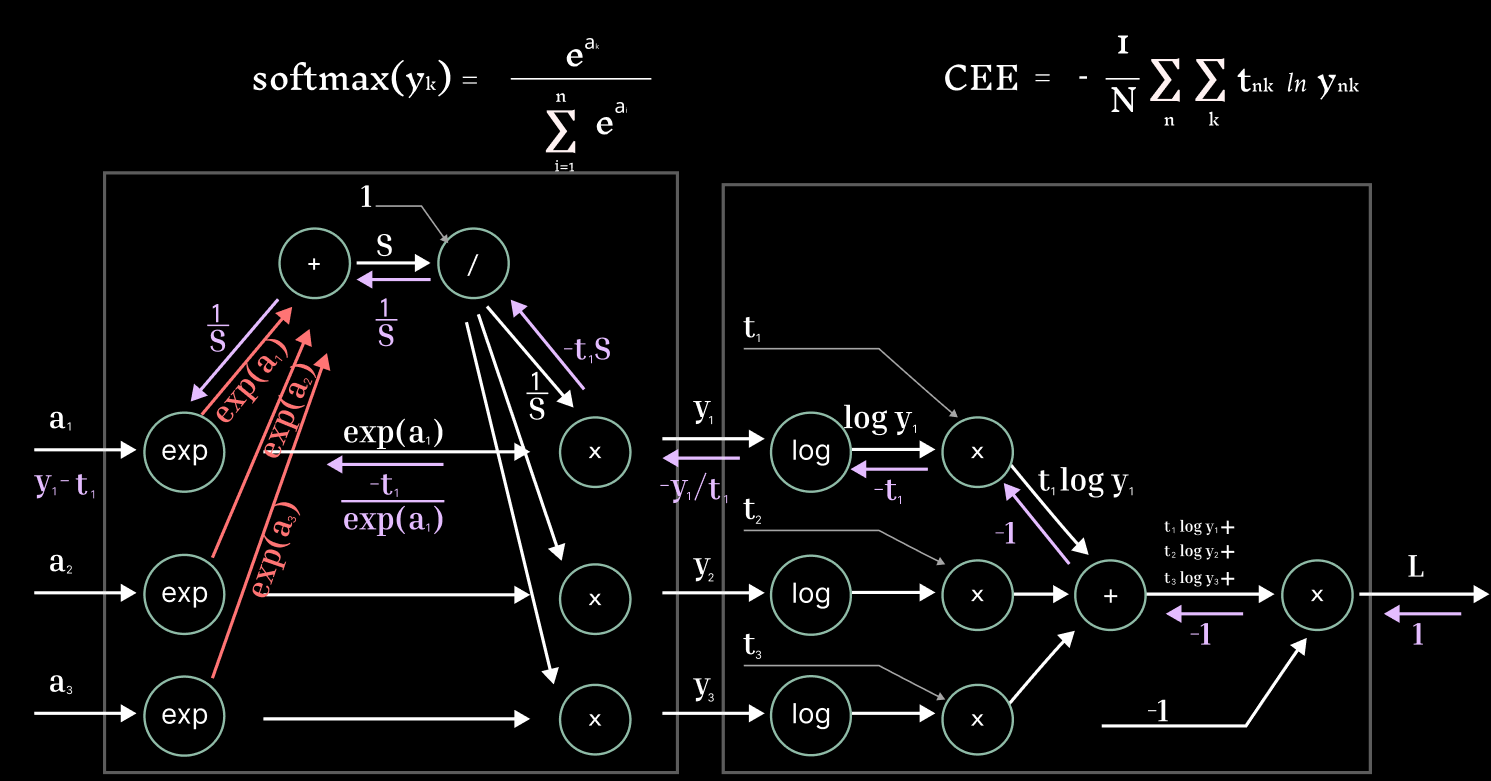

QED. 하나씩 다 증명해봄.

y1 = e**a1 / s
t1 + t2 + t3 = 1